In [1]:
#import all the libraries

import numpy as np #a powerful N-dimensional array object
import matplotlib.pyplot as plt # is a comprehensive library for creating static, animated, and interactive visualizations in Python
import pandas as pd # data analysis and manipulation tool,
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_breast_cancer #importing our cancer dataset
from sklearn.metrics import mean_squared_error #quantifying the quality of predictions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import HTML


In [2]:
#Load the Dataset
cancer = load_breast_cancer()
#describe the dataset
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [47]:
#Put the Datas into Pandas Dataframe
data1 = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data1 # to see list of columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
target=pd.DataFrame(cancer.target,columns=['target'])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [49]:
max(target['target'])

1

In [50]:
min(target['target'])

0

In [51]:
#concatenate column wise
df=pd.concat([data1,target],axis=1)

In [81]:
df.head(100)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


In [53]:
#compute the parameters by each column, provides statistical description of the dataset
df.describe().round(decimals=2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


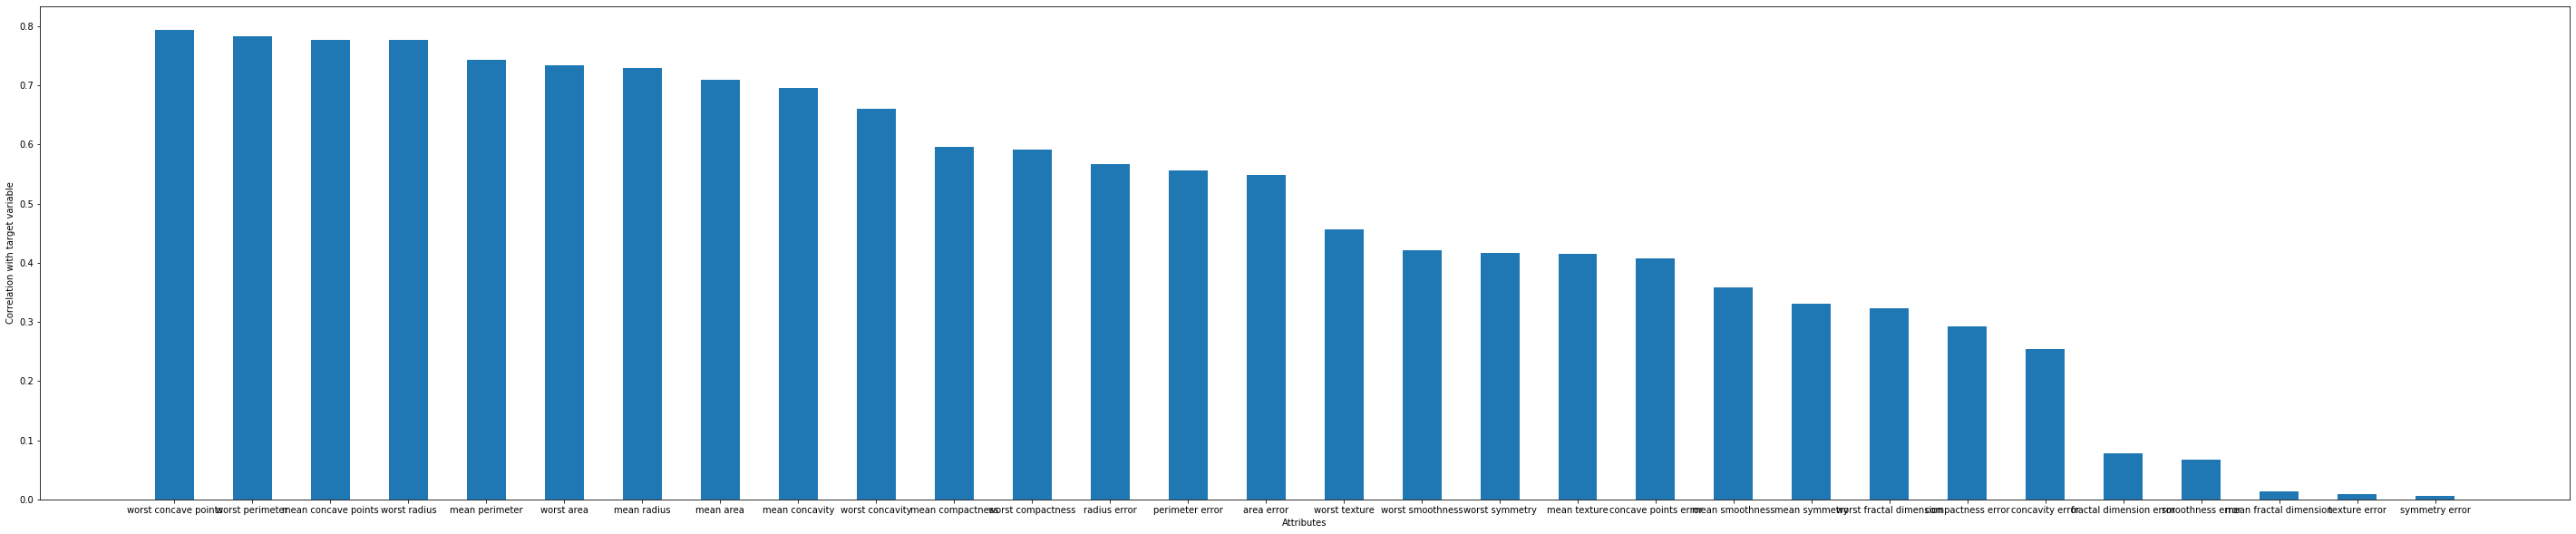

In [54]:
#correlation describe the relationship between the variables
corr=df.corr('pearson')
corrs=[abs(corr[attr]['target']) for attr in list(data1)]
l=list(zip(corrs,list(data1)))
l.sort(key=lambda x : x[0], reverse=True)
corrs,labels=list(zip((*l)))
index=np.arange(len(labels))
plt.figure(figsize=(50,10))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable')
plt.xticks(index,labels)
plt.show()

In [55]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted'])
p.head()             

,x,target_y,predicted
0,0.135842,1.0,1.071148
1,0.379725,1.0,0.654692
2,0.609966,0.0,0.261532
3,0.297595,1.0,0.794938
4,0.076357,1.0,1.172724


In [56]:
#For a binary outcome the mean is the probability of a 1, or success. 
#If we use linear regression to model a binary outcome it is entirely possible to have a fitted regression 
#which gives predicted values for some individuals which are outside of the (0,1) range or probabilities.

In [57]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
x            114 non-null float64
target_y     114 non-null float64
predicted    114 non-null float64
dtypes: float64(3)
memory usage: 2.8 KB


In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [60]:
diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['target'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [61]:
#We are interested mainly in the mean values of the features, so we will separate those features in the list below in order to make some work easier and the code more readably.
features_mean= list(df.columns[1:11])

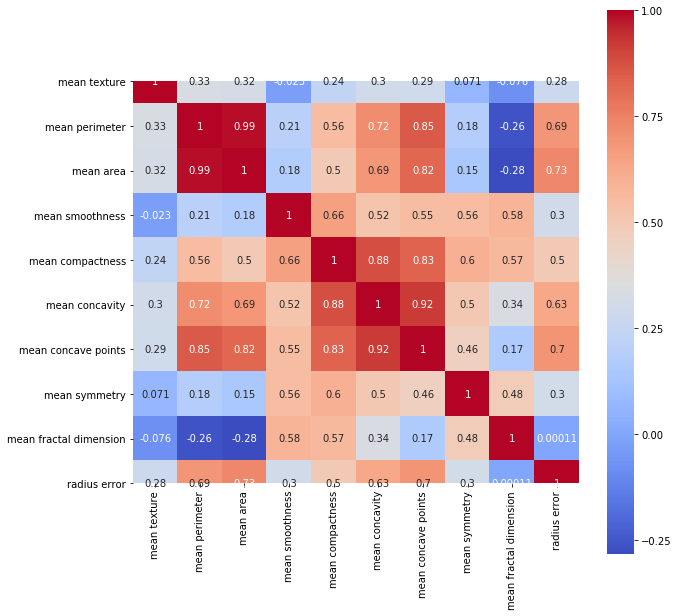

In [62]:
#use Seaborn to create a heat map of the correlations between the features.
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

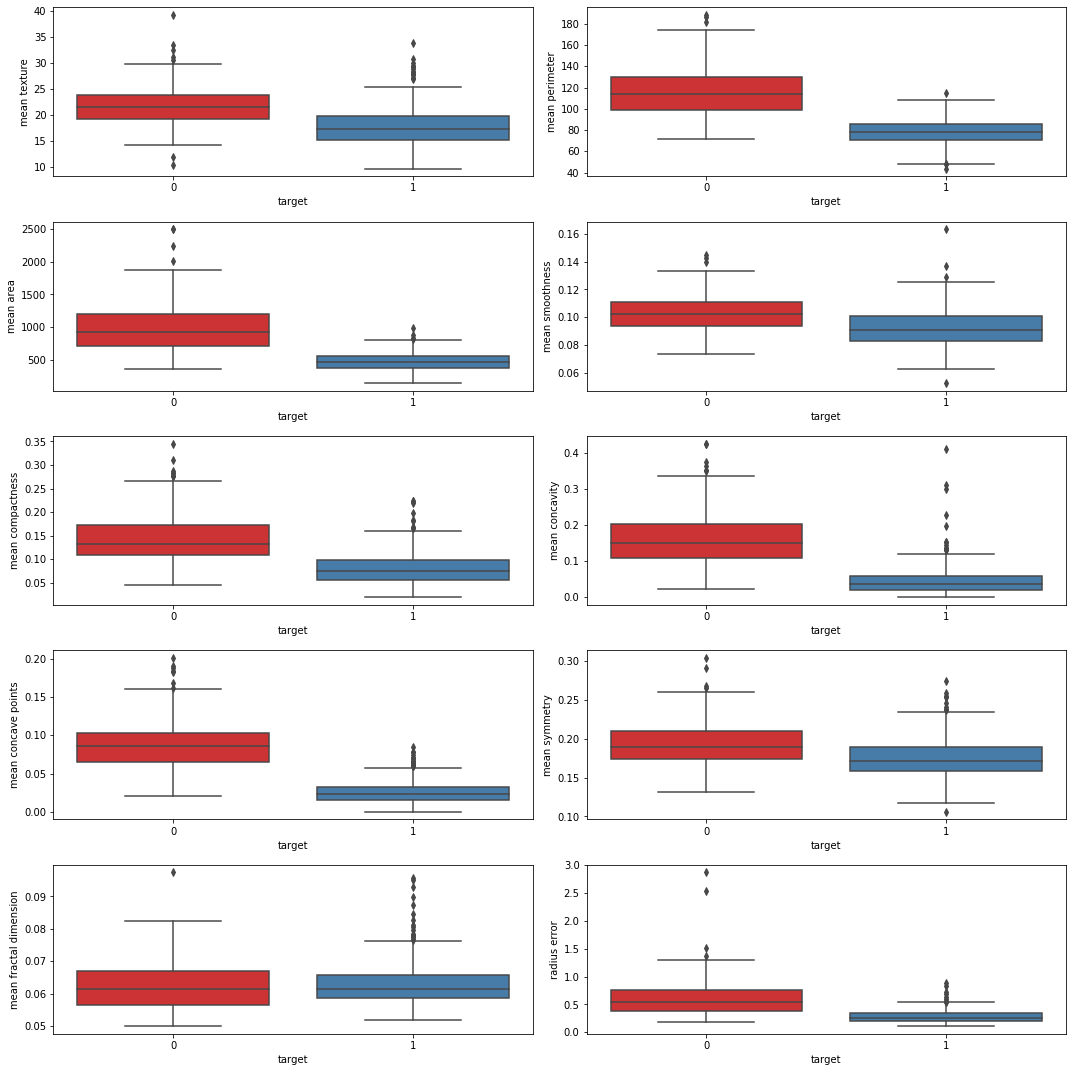

In [63]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='target', y=feature, data=df, palette="Set1")

plt.tight_layout()
plt.show()

In [64]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

In [65]:
df.isnull().sum()
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [66]:
#Machine Learning Algorithm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
#diag_map = {'M':1, 'B':0}
#df['target'] = df['target'].map(diag_map)

In [67]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [68]:
X = df.iloc[:, 1:29].values
Y = df['target'].values

In [69]:
X[28]

array([2.527e+01, 1.024e+02, 7.324e+02, 1.082e-01, 1.697e-01, 1.683e-01,
       8.751e-02, 1.926e-01, 6.540e-02, 4.390e-01, 1.012e+00, 3.498e+00,
       4.350e+01, 5.233e-03, 3.057e-02, 3.576e-02, 1.083e-02, 1.768e-02,
       2.967e-03, 2.027e+01, 3.671e+01, 1.493e+02, 1.269e+03, 1.641e-01,
       6.110e-01, 6.335e-01, 2.024e-01, 4.027e-01])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [71]:

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:

#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier7.fit(X_train, Y_train)


C:\Users\computer_user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5 = classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)
Y_pred7 = classifier7.predict(X_test)

In [74]:
ps1=pd.DataFrame(list(zip(X_test,Y_test,Y_pred1)),columns=['x','target_y','predicted'])
ps2=pd.DataFrame(list(zip(X_test,Y_test,Y_pred2)),columns=['x','target_y','predicted'])
ps3=pd.DataFrame(list(zip(X_test,Y_test,Y_pred3)),columns=['x','target_y','predicted'])
ps4=pd.DataFrame(list(zip(X_test,Y_test,Y_pred4)),columns=['x','target_y','predicted'])
ps5=pd.DataFrame(list(zip(X_test,Y_test,Y_pred5)),columns=['x','target_y','predicted'])
ps6=pd.DataFrame(list(zip(X_test,Y_test,Y_pred6)),columns=['x','target_y','predicted'])
ps7=pd.DataFrame(list(zip(X_test,Y_test,Y_pred7)),columns=['x','target_y','predicted'])

In [75]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred1)
cm2 = confusion_matrix(Y_test, Y_pred2)
cm3 = confusion_matrix(Y_test, Y_pred3)
cm4 = confusion_matrix(Y_test, Y_pred4)
cm5 = confusion_matrix(Y_test, Y_pred5)
cm6 = confusion_matrix(Y_test, Y_pred6)
cm7 = confusion_matrix(Y_test, Y_pred7)

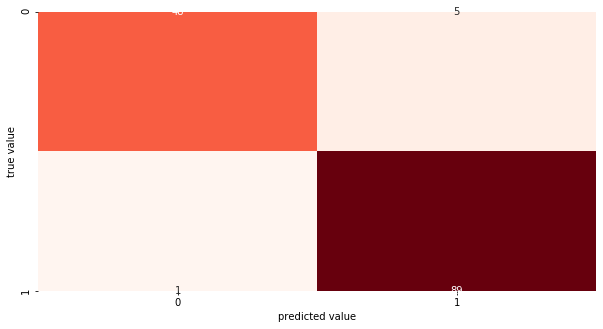

In [78]:
plt.figure(figsize=(10, 6))

sns.heatmap(cm2, square=True, annot=True, cbar=False, cmap='Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Logistic Regression:")
print(classification_report(Y_test, Y_pred1))
print("KNeighborsClassifier")
print(classification_report(Y_test, Y_pred2))
print("SVC method of svm class to use Support Vector Machine Algorithm")
print(classification_report(Y_test, Y_pred3))
print("Using SVC method of svm class to use Kernel SVM Algorithm")
print(classification_report(Y_test, Y_pred4))
print("Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm")
print(classification_report(Y_test, Y_pred5))
print("Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm")
print(classification_report(Y_test, Y_pred6))
print("Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm")
print(classification_report(Y_test, Y_pred7))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

SVC method of svm class to use Support Vector Machine Algorithm
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.9